In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import classification_report

In [75]:
data = pd.read_csv(r"C:\Users\anina\Downloads\churn-bigml-80.csv")

In [76]:
data.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [4]:
label_encoder = LabelEncoder()
data['International plan'] = label_encoder.fit_transform(data['International plan'])
data['Voice mail plan'] = label_encoder.fit_transform(data['Voice mail plan'])

In [5]:
data.head()

State  Account length  Area code  International plan  Voice mail plan  \
0    KS             128        415                   0                1   
1    OH             107        415                   0                1   
2    NJ             137        415                   0                0   
3    OH              84        408                   1                0   
4    OK              75        415                   1                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [6]:
# Display the first few rows of the dataset
print(data.head())

  State  Account length  Area code  International plan  Voice mail plan  \
0    KS             128        415                   0                1   
1    OH             107        415                   0                1   
2    NJ             137        415                   0                0   
3    OH              84        408                   1                0   
4    OK              75        415                   1                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1         

In [7]:
# Summary statistics
print(data.describe())

       Account length    Area code  International plan  Voice mail plan  \
count     2666.000000  2666.000000         2666.000000      2666.000000   
mean       100.620405   437.438860            0.101275         0.274944   
std         39.563974    42.521018            0.301750         0.446570   
min          1.000000   408.000000            0.000000         0.000000   
25%         73.000000   408.000000            0.000000         0.000000   
50%        100.000000   415.000000            0.000000         0.000000   
75%        127.000000   510.000000            0.000000         1.000000   
max        243.000000   510.000000            1.000000         1.000000   

       Number vmail messages  Total day minutes  Total day calls  \
count            2666.000000         2666.00000      2666.000000   
mean                8.021755          179.48162       100.310203   
std                13.612277           54.21035        19.988162   
min                 0.000000            0.00000     

In [8]:
# Checking for missing values
print(data.isnull().sum())

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


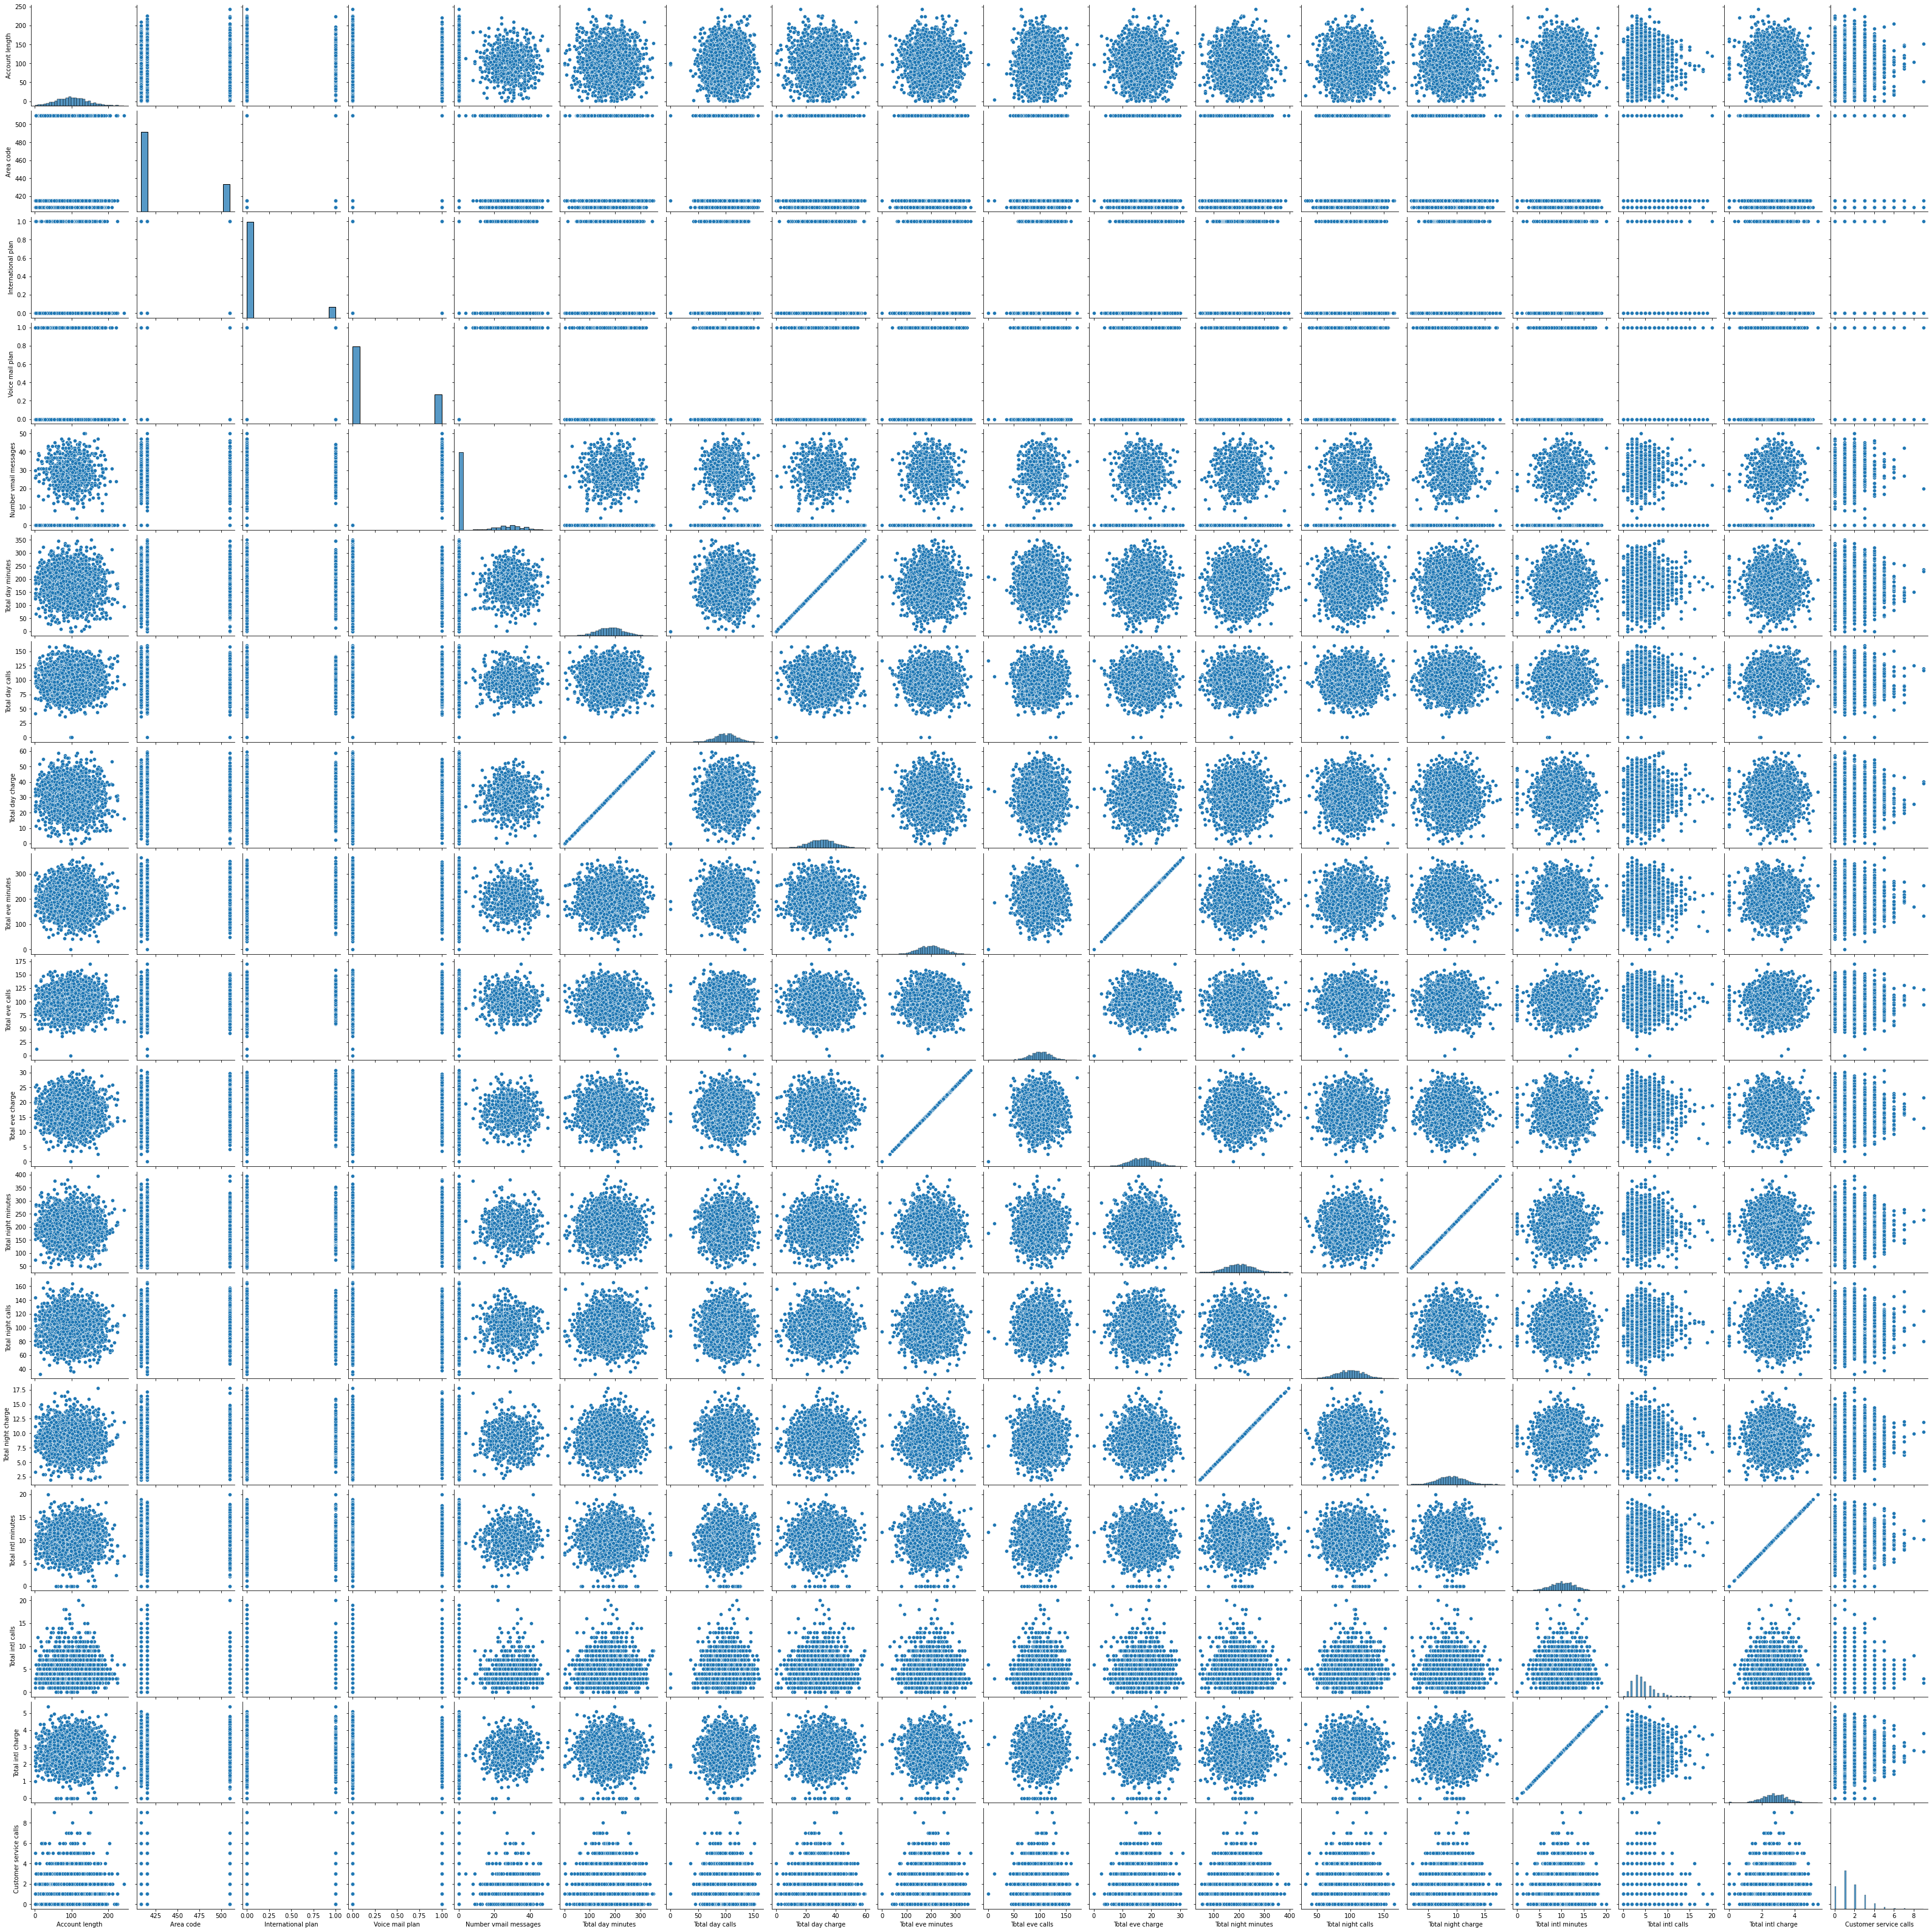

In [9]:
# Data visualization
# Pairplot for visualizing relationships between numerical variables
numerical_columns = data.select_dtypes(include=['number']).columns
sns.pairplot(data[numerical_columns])
plt.show()

In [10]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Print the correlation matrix
print(correlation_matrix)

                        Account length  Area code  International plan  \
Account length                1.000000  -0.008620            0.024500   
Area code                    -0.008620   1.000000            0.047099   
International plan            0.024500   0.047099            1.000000   
Voice mail plan               0.002448   0.007180            0.002131   
Number vmail messages        -0.002996  -0.000584            0.005858   
Total day minutes             0.002847  -0.023134            0.049550   
Total day calls               0.038862  -0.009629           -0.004277   
Total day charge              0.002843  -0.023130            0.049555   
Total eve minutes            -0.015923   0.000679            0.026616   
Total eve calls               0.018552  -0.018602            0.010277   
Total eve charge             -0.015909   0.000707            0.026623   
Total night minutes          -0.008994  -0.003353           -0.010310   
Total night calls            -0.024007   0.011455  

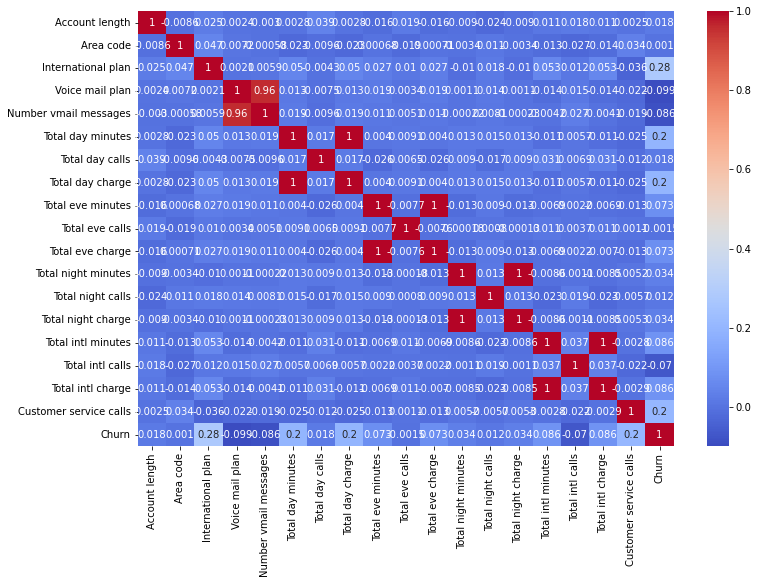

In [11]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

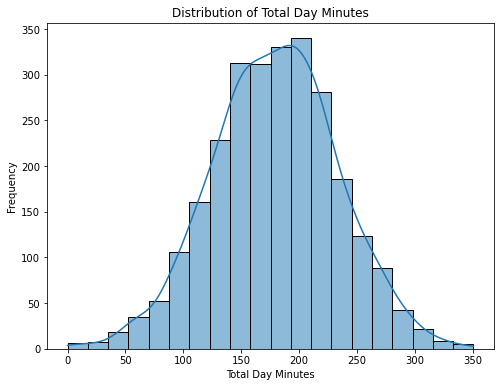

In [12]:
# Histogram of a numerical variable
plt.figure(figsize=(8, 6))
sns.histplot(data['Total day minutes'], bins=20, kde=True)
plt.title('Distribution of Total Day Minutes')
plt.xlabel('Total Day Minutes')
plt.ylabel('Frequency')
plt.show()

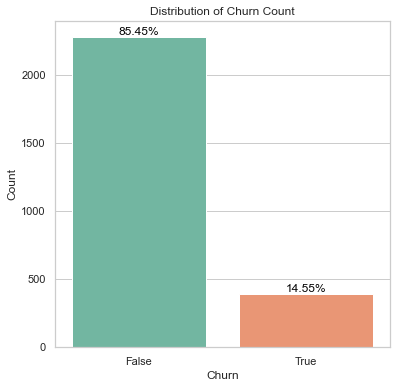

In [13]:
# Countplot for a categorical variable
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x='Churn', data=data, palette='Set2')
total = len(data['Churn'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total:.2%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Churn Count')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

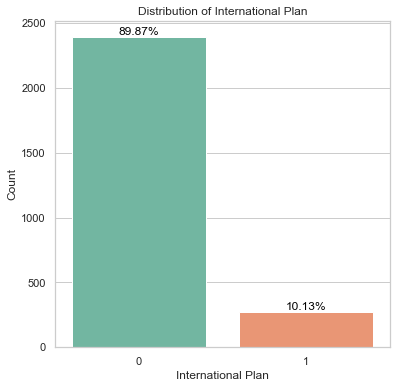

In [14]:
# Countplot for a categorical variable
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x='International plan', data=data, palette='Set2')
total = len(data['International plan'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total:.2%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Distribution of International Plan')
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.show()

In [15]:
# Select relevant features
features = ['Account length', 'Area code', 'International plan', 'Voice mail plan',
            'Number vmail messages', 'Total day minutes', 'Total day calls',
            'Total day charge', 'Total eve minutes', 'Total eve calls',
            'Total eve charge', 'Total night minutes', 'Total night calls',
            'Total night charge', 'Total intl minutes', 'Total intl calls',
            'Total intl charge', 'Customer service calls']
X = data[features]
y = data['Churn']  # Assuming you have a 'Churn' column in your dataset

In [16]:
# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [17]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Reshape the input data for LSTM layer
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_val_reshaped = X_val_scaled.reshape(X_val_scaled.shape[0], X_val_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

In [21]:
# Define the architecture of the LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1, activation='sigmoid'))
    return model

In [22]:
# Input shape is the shape of your training data (timesteps, number of features)
input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2])

# Build the LSTM model
lstm_model = build_lstm_model(input_shape)

# Compile the model with an appropriate loss function and optimizer
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [23]:
# Train the LSTM model on the training data
history = lstm_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32,
                         validation_data=(X_val_scaled, y_val), callbacks=[early_stopping])

Epoch 1/50
50/50 [==============================] - 17s 81ms/step - loss: 0.4513 - accuracy: 0.8437 - val_loss: 0.4282 - val_accuracy: 0.8574
Epoch 2/50
50/50 [==============================] - 1s 29ms/step - loss: 0.4098 - accuracy: 0.8530 - val_loss: 0.4056 - val_accuracy: 0.8574
Epoch 3/50
50/50 [==============================] - 2s 31ms/step - loss: 0.3985 - accuracy: 0.8549 - val_loss: 0.3950 - val_accuracy: 0.8574
Epoch 4/50
50/50 [==============================] - 1s 29ms/step - loss: 0.3965 - accuracy: 0.8543 - val_loss: 0.3994 - val_accuracy: 0.8555
Epoch 5/50
50/50 [==============================] - 1s 29ms/step - loss: 0.3963 - accuracy: 0.8537 - val_loss: 0.3880 - val_accuracy: 0.8574
Epoch 6/50
50/50 [==============================] - 2s 31ms/step - loss: 0.3932 - accuracy: 0.8549 - val_loss: 0.3870 - val_accuracy: 0.8574
Epoch 7/50
50/50 [==============================] - 2s 30ms/step - loss: 0.3903 - accuracy: 0.8555 - val_loss: 0.3907 - val_accuracy: 0.8630
Epoch 8/50
5

In [24]:
# Evaluate the model on the test data
y_pred = lstm_model.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

17/17 [==============================] - 1s 10ms/step
Accuracy: 0.8801
Precision: 0.6600
Recall: 0.4125
F1-Score: 0.5077
ROC-AUC: 0.8068


In [25]:
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

       False       0.90      0.96      0.93       454
        True       0.66      0.41      0.51        80

    accuracy                           0.88       534
   macro avg       0.78      0.69      0.72       534
weighted avg       0.87      0.88      0.87       534



In [30]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 18, 50)            10400     
                                                                 
 dropout_3 (Dropout)         (None, 18, 50)            0         
                                                                 
 lstm_4 (LSTM)               (None, 18, 50)            20200     
                                                                 
 dropout_4 (Dropout)         (None, 18, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

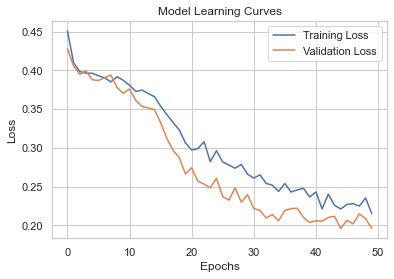

In [31]:
# Visualize learning curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

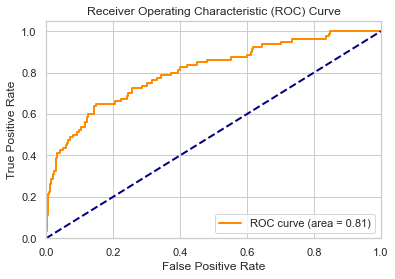

In [32]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

C:\Users\anina\AppData\Local\Temp\ipykernel_20032\2287213865.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


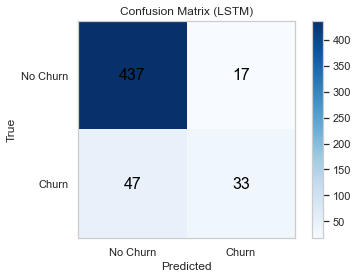

In [33]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)  
plt.title('Confusion Matrix (LSTM)') 
plt.grid(False)
plt.colorbar()

# Define class labels if needed
class_labels = ['No Churn', 'Churn']

# Display the values inside the matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center', color='black', fontsize=16)  # You can change the color here

plt.xticks([0, 1], labels=class_labels)
plt.yticks([0, 1], labels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [73]:
print(conf_matrix)

[[437  17]
 [ 47  33]]


In [ ]:
# Create and fit the Logistic Regression classifier
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_logistic = logistic_classifier.predict(X_test)

In [64]:
# Evaluate the Logistic Regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
roc_auc_logistic = roc_auc_score(y_test, logistic_classifier.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy_logistic:.4f}")
print(f"Precision: {precision_logistic:.4f}")
print(f"Recall: {recall_logistic:.4f}")
print(f"F1-Score: {f1_logistic:.4f}")
print(f"ROC-AUC: {roc_auc_logistic:.4f}")

Accuracy: 0.8558
Precision: 0.7143
Recall: 0.0625
F1-Score: 0.1149
ROC-AUC: 0.6775


In [39]:
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

       False       0.86      1.00      0.92       454
        True       0.71      0.06      0.11        80

    accuracy                           0.86       534
   macro avg       0.79      0.53      0.52       534
weighted avg       0.84      0.86      0.80       534



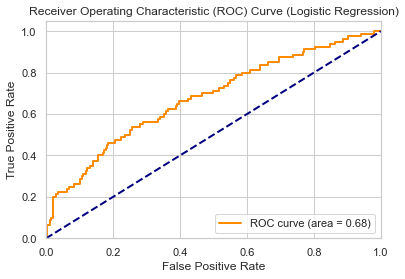

In [40]:
# ROC Curve
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, logistic_classifier.predict_proba(X_test)[:, 1])
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_logistic:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Logistic Regression)')
plt.legend(loc='lower right')
plt.show()

C:\Users\anina\AppData\Local\Temp\ipykernel_20032\3267306091.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


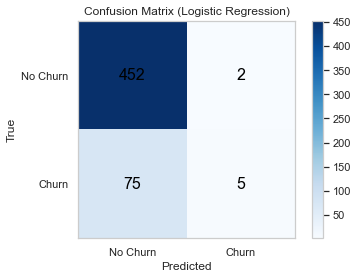

In [41]:
# Confusion matrix
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix_logistic, interpolation='nearest', cmap=plt.cm.Blues)  
plt.title('Confusion Matrix (Logistic Regression)') 
plt.grid(False)
plt.colorbar()

# Define class labels if needed
class_labels = ['No Churn', 'Churn']

# Display the values inside the matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix_logistic[i, j]), horizontalalignment='center', verticalalignment='center', color='black', fontsize=16)  # You can change the color here

plt.xticks([0, 1], labels=class_labels)
plt.yticks([0, 1], labels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [68]:
print(conf_matrix_logistic)

[[452   2]
 [ 75   5]]


In [43]:
# Create and fit the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_nb = nb_classifier.predict(X_test)

In [44]:
# Evaluate the Naive Bayes model
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)
roc_auc = roc_auc_score(y_test, nb_classifier.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Accuracy: 0.8446
Precision: 0.4776
Recall: 0.4000
F1-Score: 0.4354
ROC-AUC: 0.7720


In [45]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

       False       0.90      0.92      0.91       454
        True       0.48      0.40      0.44        80

    accuracy                           0.84       534
   macro avg       0.69      0.66      0.67       534
weighted avg       0.83      0.84      0.84       534



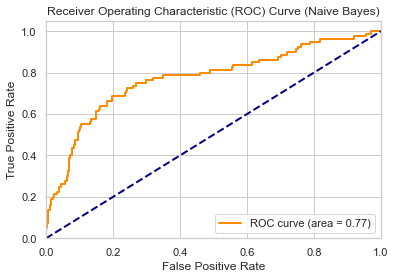

In [46]:
# ROC Curve
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_classifier.predict_proba(X_test)[:, 1])
roc_auc_nb = auc(fpr_nb, tpr_nb)
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Naive Bayes)')
plt.legend(loc='lower right')
plt.show()

C:\Users\anina\AppData\Local\Temp\ipykernel_20032\1306678690.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


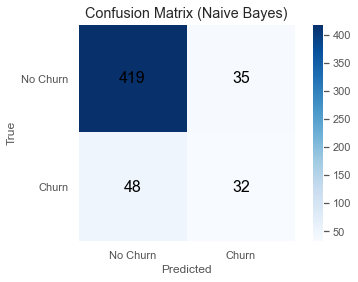

In [71]:
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix_nb, interpolation='nearest', cmap=plt.cm.Blues) 
plt.title('Confusion Matrix (Naive Bayes)')
plt.grid(False)
plt.colorbar()

# Define class labels
class_labels = ['No Churn', 'Churn']

# Display the values inside the matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix_nb[i, j]), horizontalalignment='center', verticalalignment='center', color='black', fontsize=16)  # You can change the color here

plt.xticks([0, 1], labels=class_labels)
plt.yticks([0, 1], labels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [72]:
print(conf_matrix_nb)

[[419  35]
 [ 48  32]]


In [ ]:
# Create and fit the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_classifier.predict(X_test)

In [48]:
# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, xgb_classifier.predict_proba(X_test)[:, 1])

print("XGBoost Model:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")
print(f"ROC-AUC: {roc_auc_xgb:.4f}")


XGBoost Model:
Accuracy: 0.9363
Precision: 0.9600
Recall: 0.6000
F1-Score: 0.7385
ROC-AUC: 0.8512


In [56]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

       False       0.93      1.00      0.96       454
        True       0.96      0.60      0.74        80

    accuracy                           0.94       534
   macro avg       0.95      0.80      0.85       534
weighted avg       0.94      0.94      0.93       534



C:\Users\anina\AppData\Local\Temp\ipykernel_20032\3672485128.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


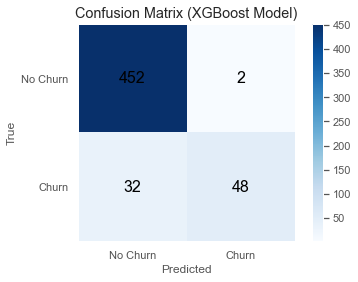

In [61]:
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix_xgb, interpolation='nearest', cmap=plt.cm.Blues) 
plt.title('Confusion Matrix (XGBoost Model)')
plt.grid(False)
plt.colorbar()

# Define class labels
class_labels = ['No Churn', 'Churn']

# Display the values inside the matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix_xgb[i, j]), horizontalalignment='center', verticalalignment='center', color='black', fontsize=16)  # You can change the color here

plt.xticks([0, 1], labels=class_labels)
plt.yticks([0, 1], labels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

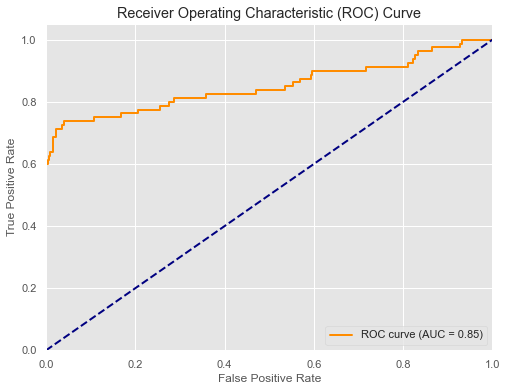

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute the ROC curve for the positive class
fpr, tpr, thresholds = roc_curve(y_test, xgb_classifier.predict_proba(X_test)[:, 1])

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create and fit the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_classifier.predict(X_test)


In [58]:
# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, dt_classifier.predict_proba(X_test)[:, 1])

print("Decision Tree Model:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")
print(f"ROC-AUC: {roc_auc_dt:.4f}")


Decision Tree Model:
Accuracy: 0.8876
Precision: 0.6515
Recall: 0.5375
F1-Score: 0.5890
ROC-AUC: 0.7434


In [65]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

       False       0.92      0.95      0.93       454
        True       0.65      0.54      0.59        80

    accuracy                           0.89       534
   macro avg       0.79      0.74      0.76       534
weighted avg       0.88      0.89      0.88       534



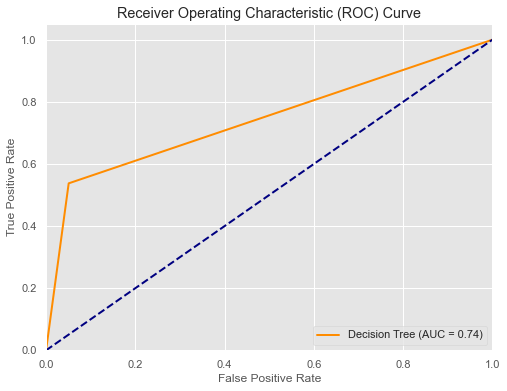

In [59]:
#ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_classifier.predict_proba(X_test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


C:\Users\anina\AppData\Local\Temp\ipykernel_20032\3338950386.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


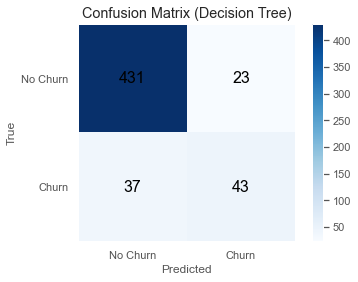

In [63]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix_dt, interpolation='nearest', cmap=plt.cm.Blues) 
plt.title('Confusion Matrix (Decision Tree)')
plt.grid(False)
plt.colorbar()

# Define class labels
class_labels = ['No Churn', 'Churn']

# Display the values inside the matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix_dt[i, j]), horizontalalignment='center', verticalalignment='center', color='black', fontsize=16)  # You can change the color here

plt.xticks([0, 1], labels=class_labels)
plt.yticks([0, 1], labels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()